# Explanatory Data Analysis

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, zscore
from pandas.plotting import scatter_matrix
import plotly.express as px
from scipy.stats import pearsonr
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

In [60]:
benin_data = pd.read_csv('../data/benin-malanville.csv')


In [61]:
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [62]:
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

# Summary Statistics

In [63]:
numeric_data = benin_data.select_dtypes(include=["number"])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64
 17  Comments       0 non-null    

### since the Comments column is totally empty I will drop it

In [64]:
numeric_data.drop('Comments', axis=1, inplace=True)

stats_summary = numeric_data.describe().transpose()
stats_summary["median"] = numeric_data.median()
stats_summary["variance"] = numeric_data.var()

In [65]:
stats_summary

,count,mean,std,min,25%,50%,75%,max,median,variance
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0,1.8,109647.955903
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3,-0.1,68492.386135
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2,1.6,25182.856923
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3,4.5,106860.248524
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3,4.3,100195.365569
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8,28.0,35.097295
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0,55.1,788.097191
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5,1.9,2.571103
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6,2.6,4.117327
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2,0.5,0.074745


# Data Quality Check 

In [66]:
missing_values = benin_data.isnull().sum()
missing_percentage = (missing_values / len(benin_data)) * 100
print("Missing Values:\n", missing_percentage)

Missing Values:
 Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [67]:
benin_data.drop('Comments', axis=1, inplace=True)

### Incorrect Entries (Negative values where only positive is allowed)

In [68]:
for col in ['GHI', 'DNI', 'DHI']:
    benin_data[col] = benin_data[col].clip(lower=0)
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

### Outlier detection using boxplots

In [69]:
def draw_box_plot(df):
    plt.figure(figsize=(12, 6))  
    sns.boxplot(data=df)
    plt.title('Boxplots')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12

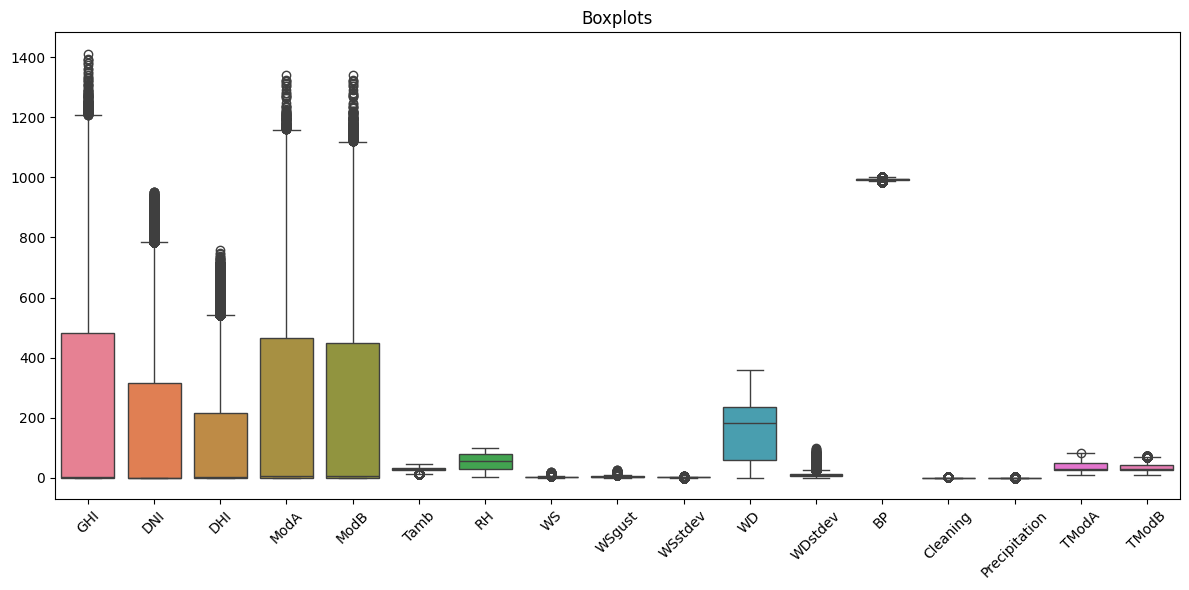

In [70]:
draw_box_plot(benin_data)

In [71]:
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

In [72]:
def remove_outliers(df):
    # Create a mask for all rows to keep
    mask = pd.Series(True, index=benin_data.index)

    for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update the mask to exclude outliers in this column
        mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

    # Apply the mask to filter out rows with outliers
    return mask


    

/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12

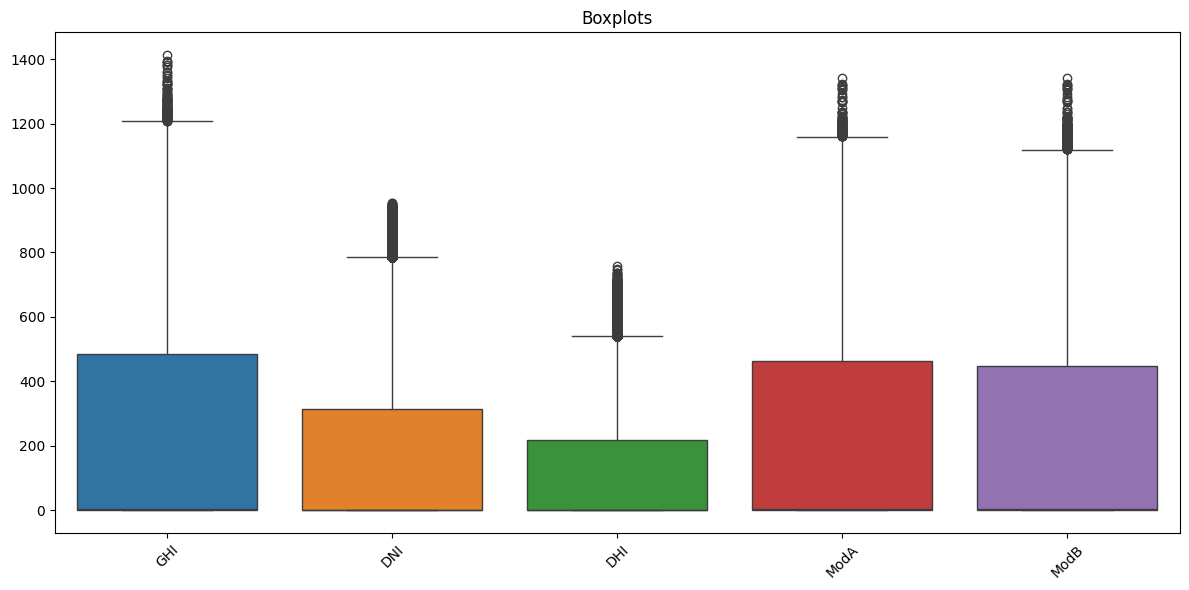

In [73]:
draw_box_plot(benin_data[outlier_columns])

In [74]:
benin_data = benin_data[remove_outliers(benin_data)]



/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kaleb/projects/kaim/KAIM-Week0/.venv/lib/python3.12

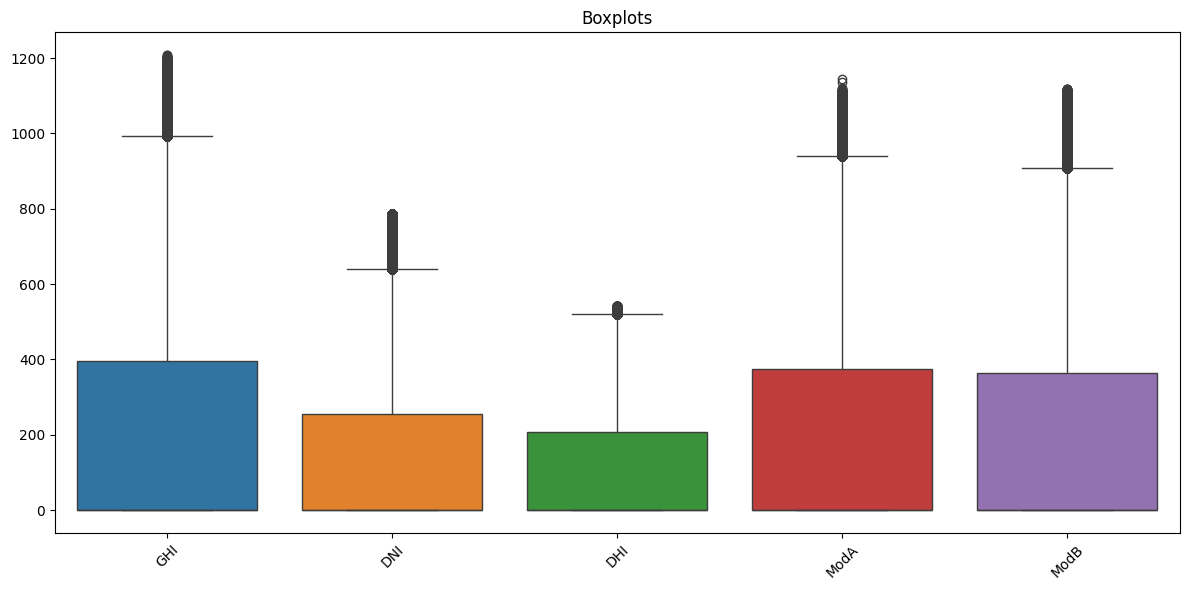

In [75]:
draw_box_plot(benin_data[outlier_columns])

The data still has outliers. This is because the data is highly skewed. Most of the values are around zero.

# Time Series Analysis

### Resample Data using timestamp as index

In [76]:
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])
benin_data.set_index('Timestamp', inplace=True)

In [77]:
monthly_data = benin_data.resample('M').mean()
hourly_data = benin_data.resample('H').mean()

/tmp/ipykernel_60503/649939907.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = benin_data.resample('M').mean()
/tmp/ipykernel_60503/649939907.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = benin_data.resample('H').mean()


In [122]:
def time_series_line_graph(title, xlabel, *args):
    plt.figure(figsize=(14, 6))
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.grid(True)
    for df, label in args:
        df.plot(kind='line', label=label, marker='o', ax=plt.gca())
    plt.legend()

    # plt.show()


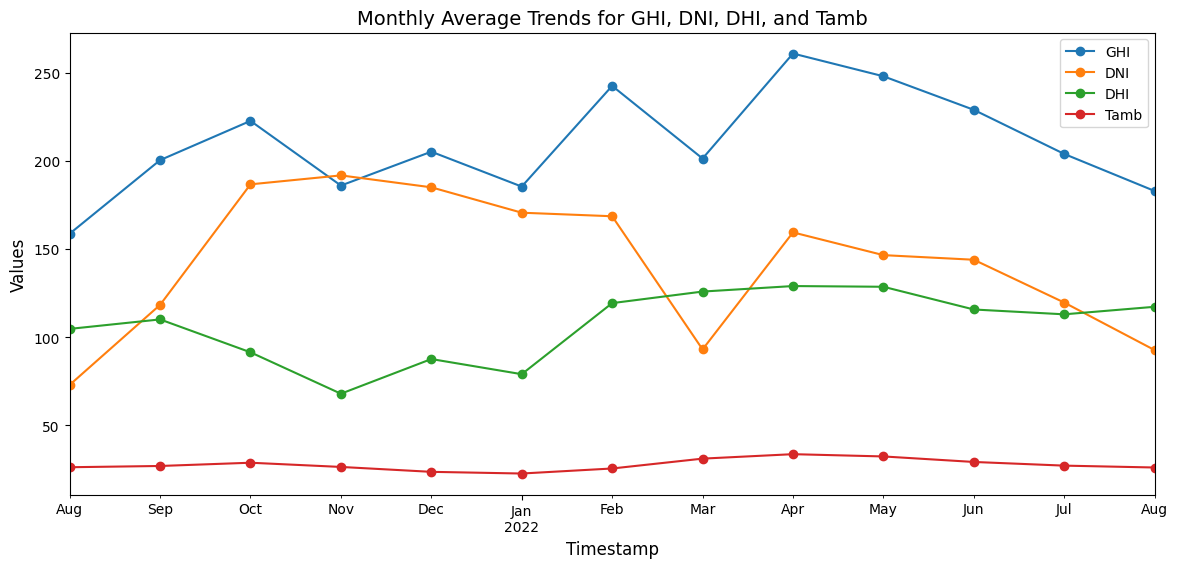

In [123]:
time_series_line_graph("Monthly Average Trends for GHI, DNI, DHI, and Tamb", 'Month', [monthly_data[['GHI', 'DNI', 'DHI', 'Tamb']], 'trends']  )

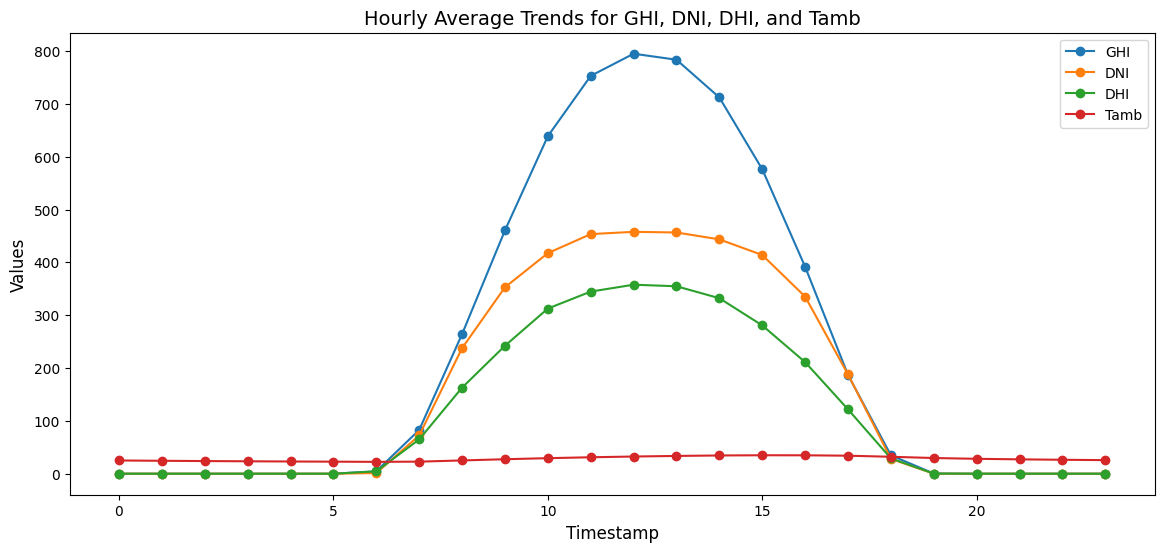

In [126]:

time_series_line_graph("Hourly Average Trends for GHI, DNI, DHI, and Tamb", 'Hourly', [hourly_data.groupby(hourly_data.index.hour).mean()[['GHI', 'DNI', 'DHI', 'Tamb']], 'trend'] )


In [96]:
cleaned_data = benin_data[benin_data['Cleaning'] == 1]
uncleaned_data = benin_data[benin_data['Cleaning'] == 0]

summary_stats = {
    'Metric': ['Mean', 'Median', 'Std'],
    'ModA (Cleaned)': [cleaned_data['ModA'].mean(), cleaned_data['ModA'].median(), cleaned_data['ModA'].std()],
    'ModA (Uncleaned)': [uncleaned_data['ModA'].mean(), uncleaned_data['ModA'].median(), uncleaned_data['ModA'].std()],
    'ModB (Cleaned)': [cleaned_data['ModB'].mean(), cleaned_data['ModB'].median(), cleaned_data['ModB'].std()],
    'ModB (Uncleaned)': [uncleaned_data['ModB'].mean(), uncleaned_data['ModB'].median(), uncleaned_data['ModB'].std()],
}

In [97]:
stats_df = pd.DataFrame(summary_stats)
print(stats_df)

   Metric  ModA (Cleaned)  ModA (Uncleaned)  ModB (Cleaned)  ModB (Uncleaned)
0    Mean      305.430228        206.227996      299.844099        199.771917
1  Median      291.600000          0.300000      281.300000          0.300000
2     Std      157.823234        302.778011      150.323817        293.650080


In [98]:
moda_ttest = ttest_ind(cleaned_data['ModA'], uncleaned_data['ModA'], equal_var=False)
modb_ttest = ttest_ind(cleaned_data['ModB'], uncleaned_data['ModB'], equal_var=False)

print("T-test results:")
print(f"ModA: t-statistic={moda_ttest.statistic}, p-value={moda_ttest.pvalue}")
print(f"ModB: t-statistic={modb_ttest.statistic}, p-value={modb_ttest.pvalue}")

T-test results:
ModA: t-statistic=13.789680852670815, p-value=9.751889038698345e-37
ModB: t-statistic=14.603636145200648, p-value=2.6574547609646474e-40


# T-test result analysis 

The t-statistic measures the difference between the means of the two groups relative to the variation within the groups. 
## T-statistic
A larger absolute t-statistic indicates a larger difference between the groups.
ModA: t-statistic = 13.79
ModB: t-statistic = 14.60
Both t-statistics are quite large, therefore there is a significant difference in the means of the groups (cleaned vs uncleaned data) for both ModA and ModB.

## P-value 
indicates the probability that the observed difference in means could have occurred by chance. A very small p-value (typically less than 0.05) suggests that the difference is statistically significant.
ModA: p-value = 9.75e-37
ModB: p-value = 2.66e-40
Both p-values are extremely small, indicating that there is a significant difference between the cleaned and uncleaned data for both ModA and ModB and it is not by chance.

In [83]:
monthly_cleaned_data = cleaned_data.resample('M').mean()
monthly_uncleaned_data = uncleaned_data.resample('M').mean()

hourly_cleaned_data = cleaned_data.resample('H').mean()
hourly_uncleaned_data = uncleaned_data.resample('H').mean()

/tmp/ipykernel_60503/3702829555.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_cleaned_data = cleaned_data.resample('M').mean()
/tmp/ipykernel_60503/3702829555.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_uncleaned_data = uncleaned_data.resample('M').mean()
/tmp/ipykernel_60503/3702829555.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_cleaned_data = cleaned_data.resample('H').mean()
/tmp/ipykernel_60503/3702829555.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_uncleaned_data = uncleaned_data.resample('H').mean()


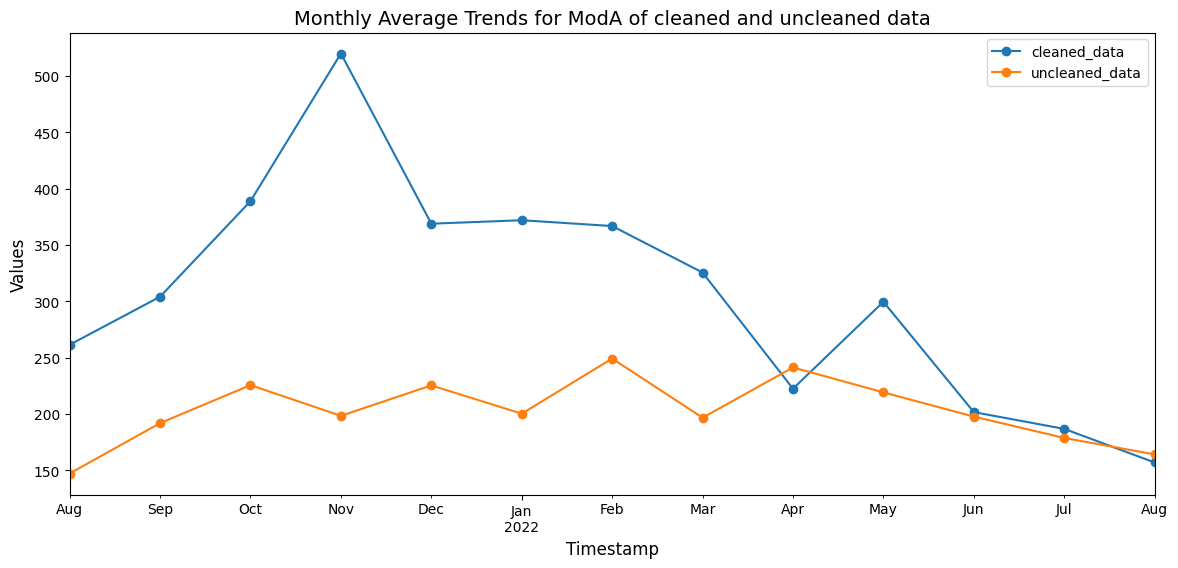

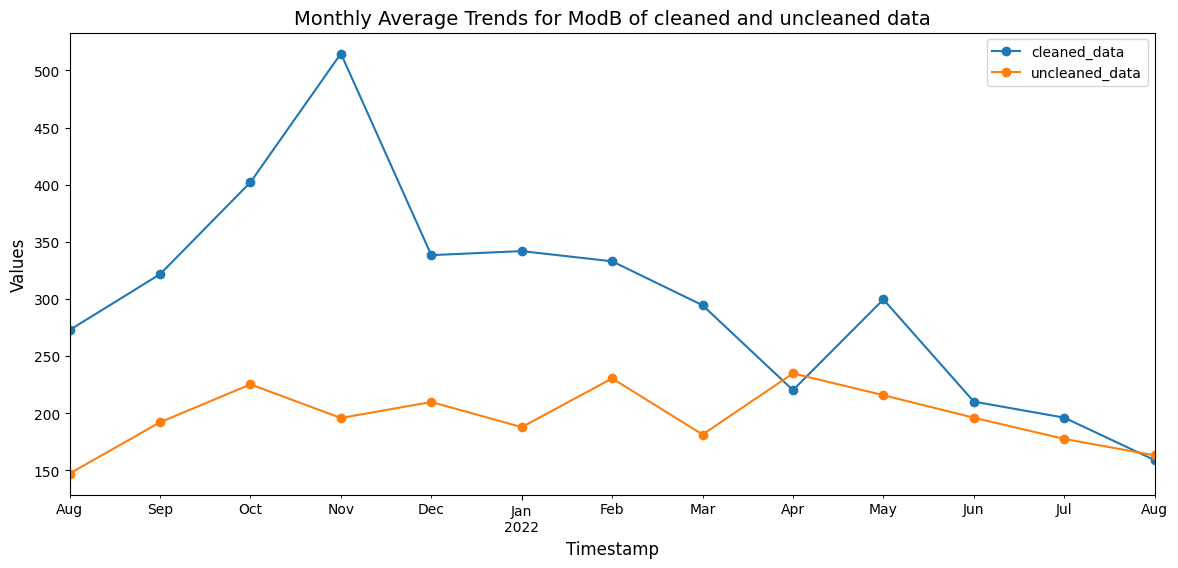

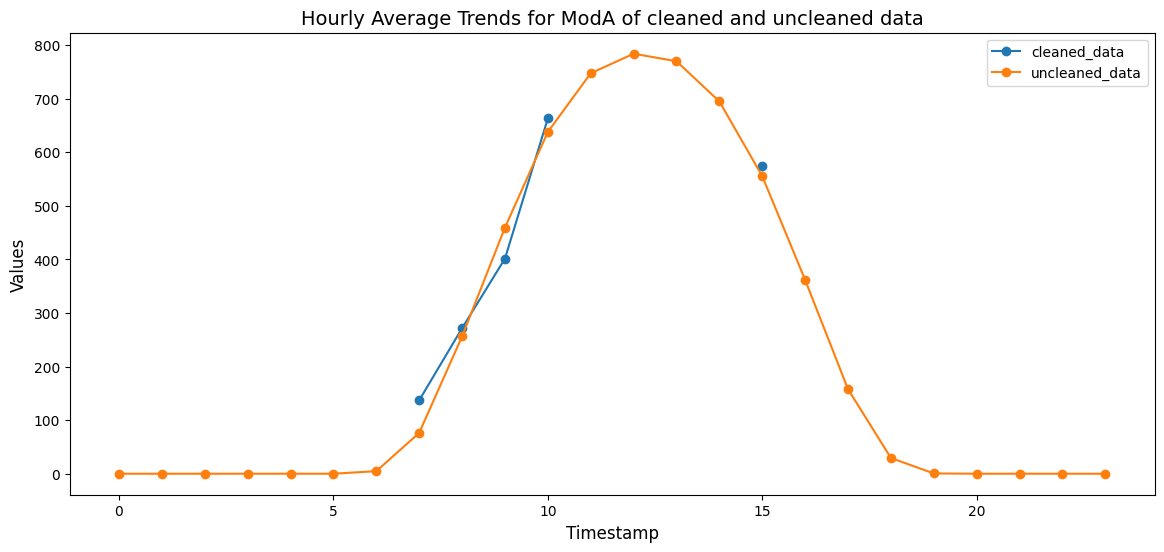

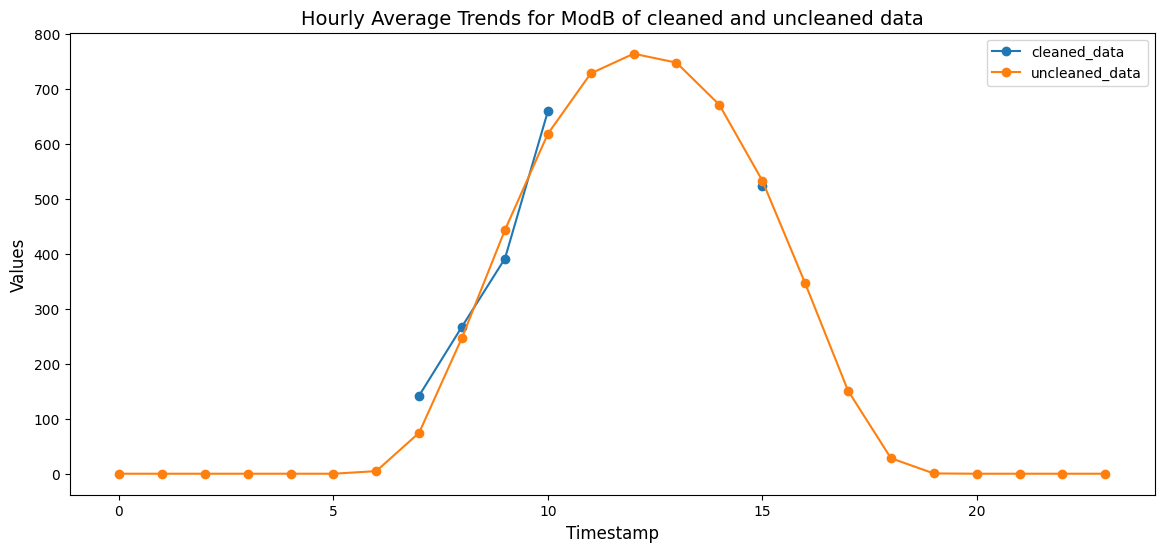

In [133]:

time_series_line_graph('Monthly Average Trends for ModA of cleaned and uncleaned data', 'Month', [monthly_cleaned_data['ModA'], 'cleaned_data'], [monthly_uncleaned_data['ModA'], 'uncleaned_data'] )
time_series_line_graph('Monthly Average Trends for ModB of cleaned and uncleaned data', 'Month', [monthly_cleaned_data['ModB'], 'cleaned_data'], [monthly_uncleaned_data['ModB'], 'uncleaned_data'] )

time_series_line_graph('Hourly Average Trends for ModA of cleaned and uncleaned data', 'Month', [hourly_cleaned_data['ModA'].groupby(hourly_cleaned_data['ModA'].index.hour).mean(),'cleaned_data'], [hourly_uncleaned_data['ModA'].groupby(hourly_uncleaned_data['ModA'].index.hour).mean(), 'uncleaned_data'] )
time_series_line_graph('Hourly Average Trends for ModB of cleaned and uncleaned data', 'Month', [hourly_cleaned_data['ModB'].groupby(hourly_cleaned_data['ModB'].index.hour).mean(), 'cleaned_data'], [hourly_uncleaned_data['ModB'].groupby(hourly_uncleaned_data['ModB'].index.hour).mean(), 'uncleaned_data'] )


## Correlation Analysis

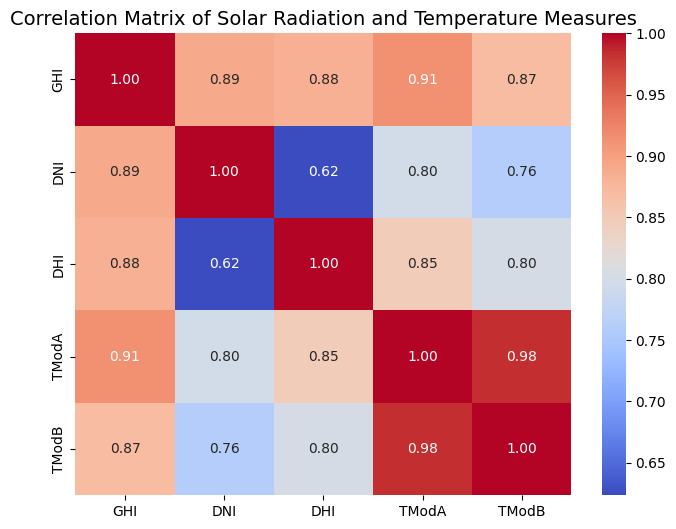

In [135]:

solar_temp_data = benin_data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']]

correlation_matrix = solar_temp_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Solar Radiation and Temperature Measures", fontsize=14)
plt.show()


### Insights
There is very strong correlation between TModA and TModB. GHI has strong correlation with all the above variables. We can also see that DHI and DNI have the lowest correlation. 

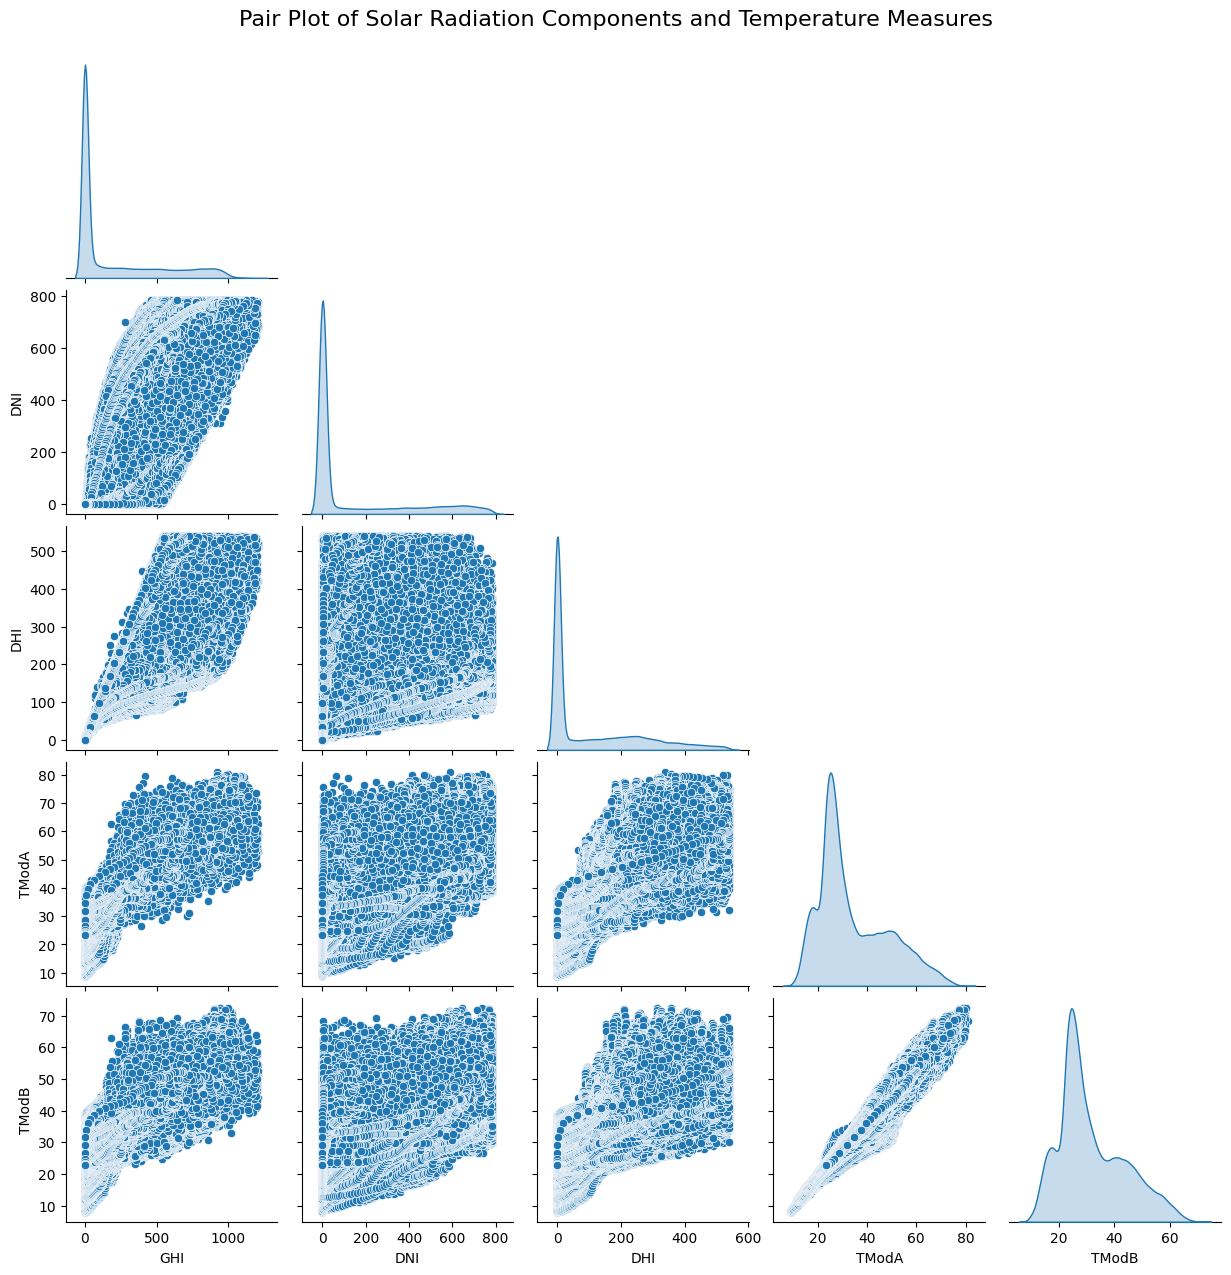

In [136]:
sns.pairplot(solar_temp_data, diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Solar Radiation Components and Temperature Measures", y=1.02, fontsize=16)
plt.show()


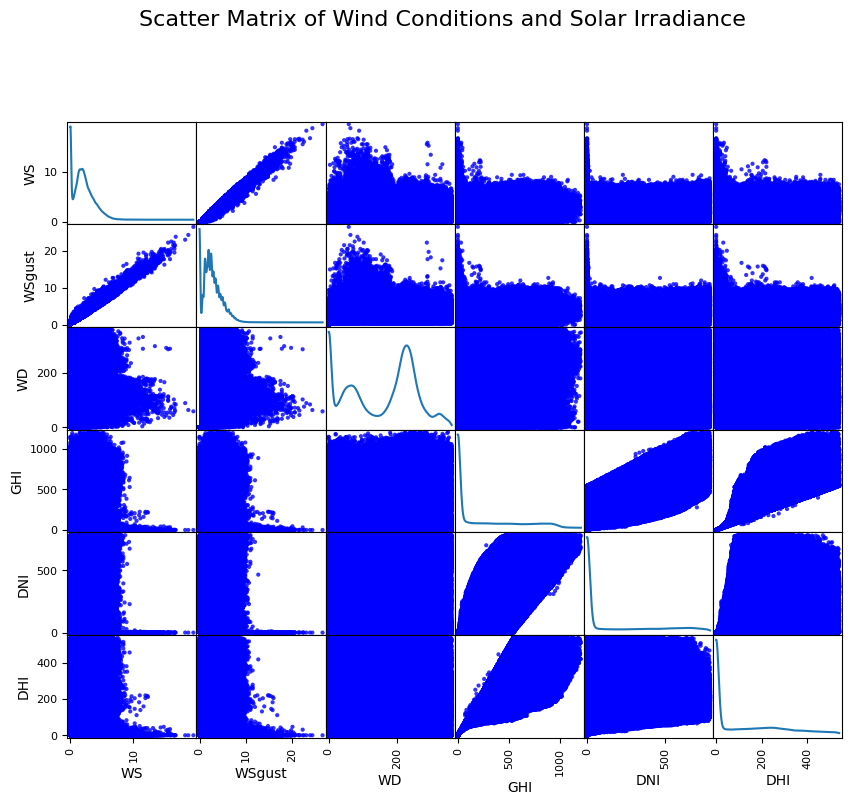

In [140]:
# Select relevant columns
wind_solar_data = benin_data[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']]

# Create scatter matrix
scatter_matrix(wind_solar_data, figsize=(10, 8), alpha=0.8, diagonal='kde', color='blue')
plt.suptitle("Scatter Matrix of Wind Conditions and Solar Irradiance", y=1.02, fontsize=16)
plt.show()


#### Insights
There is strong correlation with values WSGust and WS. Although not stronger, there is also correlation between GHI and DHI, GHI and DNI.

# Wind Analysis

### Wind Rose

In [154]:


fig = px.bar_polar(benin_data, r="WS", theta="WD", color="WS",
                   color_continuous_scale="Viridis", 
                   title="Wind Rose: Distribution of Wind Speed and Direction",
                   template="plotly_dark")

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
# Create the wind rose plot
def plot_wind_rose(wind_speeds, wind_directions):
    ax = WindroseAxes.from_ax()
    ax.bar(
        wind_directions, wind_speeds, 
        normed=True, opening=0.8, edgecolor="black"
    )
    ax.set_legend(title="Wind Speed (m/s)")
    plt.title("Wind Rose: Wind Speed and Direction")
    plt.show()

# Call the function with your data
plot_wind_rose(df["WS"], df["WD"])

In [ ]:


# Load your data (replace 'your_data.csv' with the actual file path)
data = pd.read_csv("your_data.csv")

# Columns of interest
columns = ['RH', 'Tamb', 'GHI', 'DNI', 'DHI']
data = data[columns].dropna()  # Drop rows with missing values

# Correlation analysis
print("Correlation Coefficients:")
for col in ['Tamb', 'GHI', 'DNI', 'DHI']:
    corr, p_value = pearsonr(data['RH'], data[col])
    print(f"RH and {col}: Correlation = {corr:.2f}, p-value = {p_value:.2e}")

# Scatter plots with regression lines
sns.set(style="darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, col in enumerate(['Tamb', 'GHI', 'DNI', 'DHI']):
    sns.regplot(x='RH', y=col, data=data, ax=axes[ax], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    axes[ax].set_title(f"RH vs {col}")

plt.tight_layout()
plt.show()

# Linear regression for RH vs Tamb
X = data[['RH']]
y_temp = data['Tamb']
model_temp = LinearRegression().fit(X, y_temp)
y_pred_temp = model_temp.predict(X)
r2_temp = r2_score(y_temp, y_pred_temp)

print("\nLinear Regression: RH vs Tamb")
print(f"Coefficient: {model_temp.coef_[0]:.2f}")
print(f"Intercept: {model_temp.intercept_:.2f}")
print(f"R²: {r2_temp:.2f}")

# Repeat regression for solar radiation
for col in ['GHI', 'DNI', 'DHI']:
    y = data[col]
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    print(f"\nLinear Regression: RH vs {col}")
    print(f"Coefficient: {model.coef_[0]:.2f}")
    print(f"Intercept: {model.intercept_:.2f}")
    print(f"R²: {r2:.2f}")
